In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Capstone_project/data/processed_dataset.csv")
df.sample(10).T

,23,436,43,551,754,1192,889,418,77,768
Age,41.0,23.0,18.0,27.0,34.0,25.0,40.0,28.0,31.0,32.0
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
self_employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
family_history,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
treatment,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
work_interfere,0.0,0.666667,1.0,0.333333,0.333333,0.0,1.0,0.333333,0.666667,0.0
no_employees,1.0,0.4,0.2,0.6,0.4,0.6,0.8,0.0,0.0,1.0
remote_work,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
tech_company,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
leave,0.5,0.5,0.25,0.75,0.75,0.5,0.5,1.0,0.25,0.5


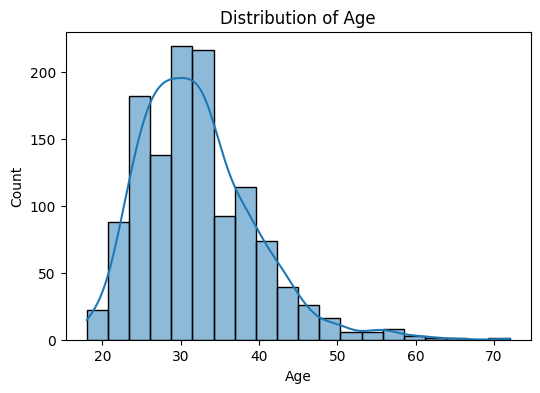

count    1252.000000
mean       32.074281
std         7.282914
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


In [130]:
target = "Age" if "Age" in df.columns else "Age_capped"

# Plot distribution
plt.figure(figsize=(6,4))
sns.histplot(df[target], bins=20, kde=True)
plt.title(f"Distribution of {target}")
plt.xlabel("Age")
plt.show()

# Summary stats
print(df[target].describe())

Correlation Scan (Linear Relationship)

In [131]:
# Select numeric columns only (exclude target)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target_col]

# Compute correlations
corrs = df[numeric_cols + [target]].corr()[target].sort_values(ascending=False)
print(corrs.head(7))  # Top positive correlations
print(corrs.tail(7))  # Top negative correlations


Age                   1.000000
workplace_support     0.157740
remote_work           0.146885
no_employees          0.116826
health_consequence    0.105978
self_employed         0.074198
treatment             0.073994
Name: Age, dtype: float64
family_history        0.009883
work_interfere        0.007477
social_support        0.002326
mental_vs_physical   -0.028862
leave                -0.047466
tech_company         -0.056257
health_interview     -0.058643
Name: Age, dtype: float64


If correlations are all < 0.2 → age has weak linear signal → tree-based models may work better than linear models.

Use top correlated features in your report to justify why predicting age is challenging.

In [132]:
print(corrs.head(15))

Age                   1.000000
workplace_support     0.157740
remote_work           0.146885
no_employees          0.116826
health_consequence    0.105978
self_employed         0.074198
treatment             0.073994
family_history        0.009883
work_interfere        0.007477
social_support        0.002326
mental_vs_physical   -0.028862
leave                -0.047466
tech_company         -0.056257
health_interview     -0.058643
Name: Age, dtype: float64


## 3. Age Bins & Behavioral Trends

/tmp/ipython-input-260664598.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("_age_bin")[col]


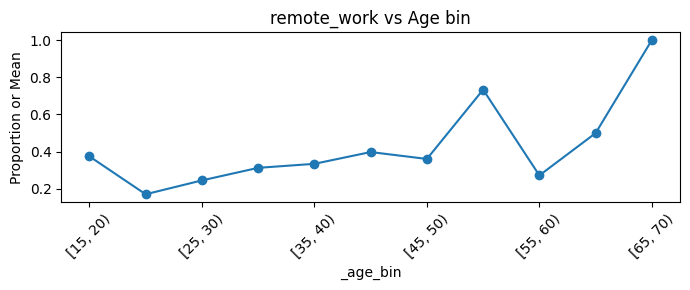

/tmp/ipython-input-260664598.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("_age_bin")[col]


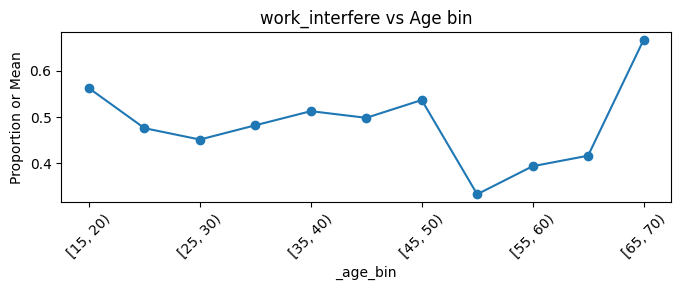

/tmp/ipython-input-260664598.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("_age_bin")[col]


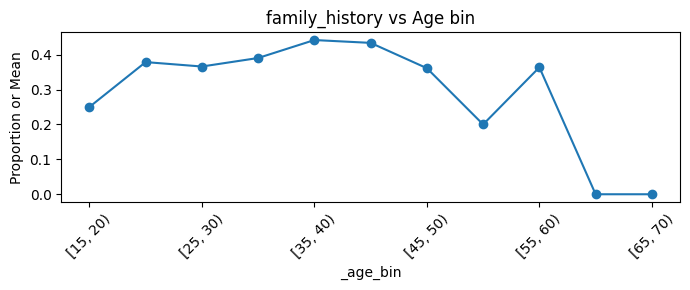

In [133]:
# Define bins (e.g., 18-25, 26-30, etc.)
bins = list(range(15, 75, 5))
df["_age_bin"] = pd.cut(df[target], bins=bins, right=False)

# Example behavioral columns (replace with actual column names in your dataset)
trend_cols = [col for col in ["remote_work", "work_interfere", "family_history", "mental_health_discussion"] if col in df.columns]

for col in trend_cols:
    plt.figure(figsize=(7,3))
    (
        df.groupby("_age_bin")[col]
        .apply(lambda s: s.map({"Yes":1,"No":0}).mean() if s.dtype=="O" else s.mean())
        .plot(marker="o")
    )
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Age bin")
    plt.ylabel("Proportion or Mean")
    plt.tight_layout()
    plt.show()


here’s no strong monotonic trend by age; tail bins are unstable

In [134]:
bin_counts = df["_age_bin"].value_counts().sort_index()
print(bin_counts)

# Optional: mark low-support bins
LOW_N = 25
low_bins = bin_counts[bin_counts < LOW_N].index.tolist()
low_bins


_age_bin
[15, 20)     16
[20, 25)    140
[25, 30)    358
[30, 35)    351
[35, 40)    206
[40, 45)    113
[45, 50)     36
[50, 55)     15
[55, 60)     11
[60, 65)      4
[65, 70)      1
Name: count, dtype: int64


[Interval(15, 20, closed='left'),
 Interval(50, 55, closed='left'),
 Interval(55, 60, closed='left'),
 Interval(60, 65, closed='left'),
 Interval(65, 70, closed='left')]

Use Spearman (monotonic) and Mutual Information (non-linear) instead of only Pearson

In [135]:
from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

# 1) Spearman on numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.drop(target, errors="ignore")
spearman_scores = []
for c in num_cols:
    valid = df[[c, target]].dropna()
    if len(valid) > 10:
        rho, p = spearmanr(valid[c], valid[target])
        spearman_scores.append((c, rho, p))

spearman_df = pd.DataFrame(spearman_scores, columns=["feature","spearman_rho","p_value"])\
                .sort_values("spearman_rho", ascending=False)
spearman_df.head(10)

# 2) Mutual Information on a quick one-hot view (captures non-linear signal)
cat_cols = [c for c in df.columns if c not in num_cols and c != target]
X_num = df[num_cols].copy()
X_cat = pd.get_dummies(df[cat_cols], drop_first=True)
X_mi = pd.concat([X_num, X_cat], axis=1).fillna(0)

mi = mutual_info_regression(X_mi, df[target])
mi_df = pd.DataFrame({"feature": X_mi.columns, "MI": mi}).sort_values("MI", ascending=False)
mi_df.head(15)


,feature,MI
28,"_age_bin_[25, 30)",0.609102
29,"_age_bin_[30, 35)",0.580993
30,"_age_bin_[35, 40)",0.441252
27,"_age_bin_[20, 25)",0.337884
31,"_age_bin_[40, 45)",0.283526
32,"_age_bin_[45, 50)",0.124158
33,"_age_bin_[50, 55)",0.076194
34,"_age_bin_[55, 60)",0.066983
4,no_employees,0.054730
16,Country_top_France,0.039157


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

In [138]:
#1) Split and columns
y = df[target].copy()
X = df.drop(columns=[target, "_age_bin"], errors="ignore")

cat_cols = X.select_dtypes(include=["object","bool","category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()


In [139]:
# 2) Preprocessor: impute + scale numeric, impute + one-hot categorical (dense)
ohe = OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)
preprocess = ColumnTransformer(
    [
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe)
        ]), cat_cols)
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Numeric → median imputation + scaling.

Categorical → impute mode + one-hot (dense) so all regressors work.

Add a target transformer (reduces heavy-tail pain)

We’ll wrap each regressor in TransformedTargetRegressor with Yeo-Johnson.
This transforms y during training and auto-inverse-transforms predictions back to age.

In [140]:
print(df.shape)
df.columns

(1252, 17)


Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'leave', 'mental_vs_physical', 'Country_top', 'workplace_support',
       'health_interview', 'health_consequence', 'social_support', '_age_bin'],
      dtype='object')

In [141]:
print(X_train.shape)
X.columns

(1001, 15)


Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'leave', 'mental_vs_physical', 'Country_top', 'workplace_support',
       'health_interview', 'health_consequence', 'social_support'],
      dtype='object')

In [142]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

ttr = lambda reg: TransformedTargetRegressor(
    regressor=reg,
    transformer=PowerTransformer(method="yeo-johnson")
)


In [143]:
def evaluate(y_true, y_pred, label):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f"{label} -> MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")
    return {"Model": label, "MAE": mae, "RMSE": rmse, "R2": r2}

This stabilizes variance in Age so models see an easier target.

##  Train linear model (RidgeCV)

In [144]:
ridge = Pipeline([
    ("prep", preprocess),
    ("ttr", ttr(RidgeCV(alphas=np.logspace(-3,3,21), cv=5)))
])

lasso = Pipeline([
    ("prep", preprocess),
    ("model", ttr(LassoCV(alphas=np.logspace(-3, 1, 21), cv=5, random_state=42)))
])


In [145]:
results = []

for name, model in [("RidgeCV", ridge), ("LassoCV", lasso)]:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results.append(evaluate(y_test, preds, name))


# ridge_pipe.fit(X_train, y_train)
# ridge_pred = ridge_pipe.predict(X_test)
# ridge_row = evaluate(y_test, ridge_pred, "RidgeCV")


Training RidgeCV...
RidgeCV -> MAE: 4.79 | RMSE: 6.24 | R²: 0.097
Training LassoCV...
LassoCV -> MAE: 4.80 | RMSE: 6.26 | R²: 0.092


RidgeCV chooses the regularization strength via 5-fold CV internally

##  Train tree model (Random Forest)

In [146]:
from sklearn.ensemble import RandomForestRegressor

rf = Pipeline([
    ("prep", preprocess),
    ("ttr", ttr(RandomForestRegressor(n_estimators=400, random_state=42)))
])

gb = Pipeline([
    ("prep", preprocess),
    ("model", ttr(GradientBoostingRegressor(n_estimators=300, random_state=42)))
])


In [147]:
for name, model in [("RandomForest", rf), ("GradientBoosting", gb)]:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results.append(evaluate(y_test, preds, name))

# rf_pipe.fit(X_train, y_train)
# rf_pred = rf_pipe.predict(X_test)
# rf_row = evaluate(y_test, rf_pred, "RandomForest")

Training RandomForest...
RandomForest -> MAE: 5.04 | RMSE: 6.62 | R²: -0.016
Training GradientBoosting...
GradientBoosting -> MAE: 5.04 | RMSE: 6.65 | R²: -0.025


In [148]:
metrics_df = pd.DataFrame(results).sort_values(by="MAE")
print(metrics_df)

              Model       MAE      RMSE        R2
0           RidgeCV  4.787509  6.241629  0.097492
1           LassoCV  4.799571  6.260821  0.091933
2      RandomForest  5.041378  6.621371 -0.015666
3  GradientBoosting  5.042294  6.652729 -0.025309


In [149]:
# import joblib

# # Save the trained Ridge pipeline
# joblib.dump(ridge, "ridge_model_pipeline.joblib")

# print("Model saved as ridge_model_pipeline.joblib")

Model saved as ridge_model_pipeline.joblib


In [152]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
